# 爬虫链家

## 爬取区域房价 Crawl house prices of areas

### 包括区级-街道-路 Including district-avenue - street/road

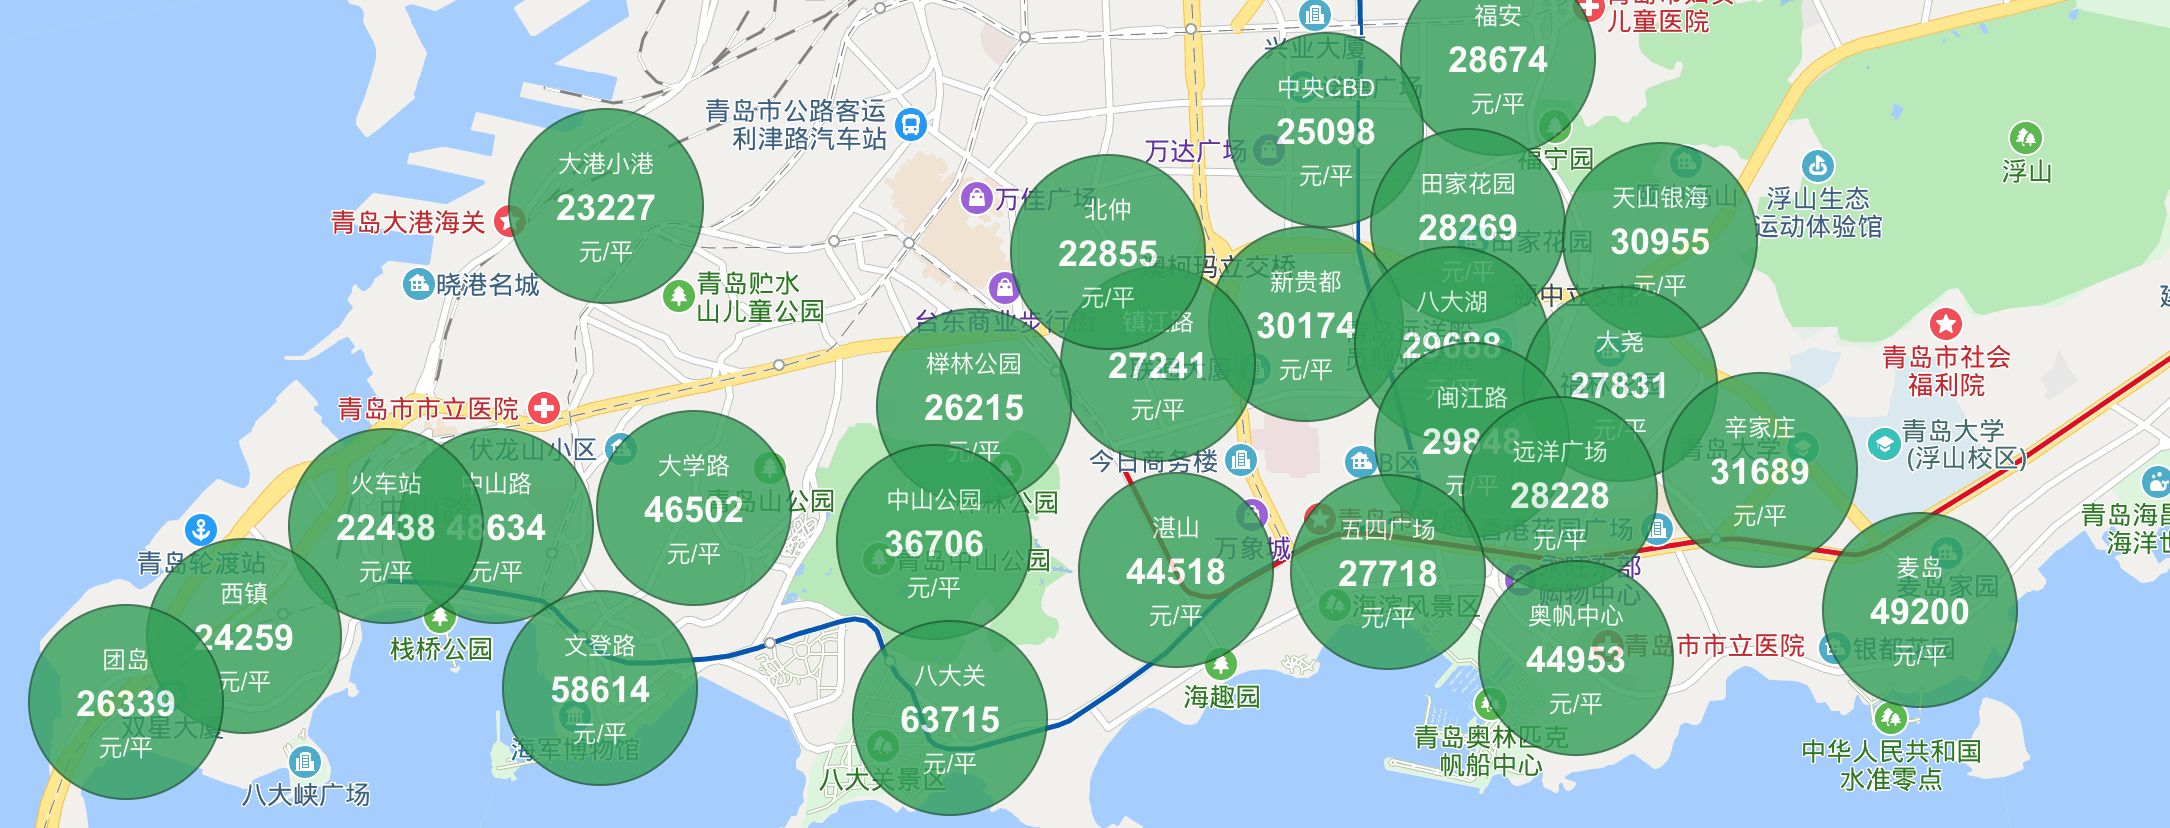

In [5]:
import urllib.request
import urllib.parse
import json
import csv
import requests

In [6]:
def get_max_id(html):
    a = 0
    while True:
        b = str(a)
        if b in html:
            a = a+1
        if b not in html:
            break
    max_id = a        
    return max_id

def openfile(fileName):
    return open('aaa/'+fileName+'.csv','w',encoding='utf-8',newline='')
def save2file(fd,data):
    writer = csv.writer(fd)
    for item in data:
        writer.writerow(item)
    fd.close()

In [7]:
def get_price_data(html,max_id,fd):
    region = []
    region_pinyin = []
    transPrice = []
    for i in range(max_id):
        region.append(html[str(i)]['name'])
        region_pinyin.append(html[str(i)]['quanpin_url'])
        transPrice.append(html[str(i)]['transPrice'])
    data_0 = zip(region,region_pinyin,transPrice)
    save2file(fd,data_0)
    data = zip(region,region_pinyin,transPrice)
    return data

def get_html(region_name):
    url = 'https://qd.lianjia.com/fangjia/priceMap/'+urllib.parse.quote(region_name)+'/'
    headers = { 
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'
    }
    response = requests.get(url=url,headers=headers)
    html = response.json()
    return html

def AAA(name,pinyin):
    html = get_html(pinyin)
    max_id = get_max_id(html)
    fd = openfile(name)
    data = get_price_data(html,max_id,fd)
    return data

In [8]:
import urllib.request
import urllib.parse
import json
import csv
import requests


#def qd_price:
qd_url = 'https://qd.lianjia.com/fangjia/priceMap/'
headers = { 
    'User-Agent':'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'
    }
qd_response = requests.get(url=qd_url,headers=headers)
qd_html = qd_response.json()
qd_max_id = get_max_id(qd_html)
qd_fd = openfile('青岛')
qd_data = get_price_data(qd_html,qd_max_id,qd_fd)
for area in qd_data:
    area_name = area[0]
    area_pinyin = area[1]
    area_data = AAA(area_name,area_pinyin)
    for street in area_data:
        street_name = street[0]
        street_pinyin = street[1]
        street_data = AAA(street_name,street_pinyin)
        for road in street_data:
            road_name = road[0]
            road_pinyin = road[1]
            road_data = AAA(road_name,road_pinyin)